# *Comments*

# *Visulization with too many Ticks*

# *Bar graph and Histogram for same columns*

# COVID-19 GLOBAL-Dataset

# 1.About Dataset
The COVID-19 Global Dataset offers comprehensive insights into the impact of the COVID-19 pandemic worldwide. It provides detailed statistics on COVID-19 cases, deaths, recoveries, testing, and demographic information across various countries and regions. Sourced from reliable sources, including government health departments and international organizations, this dataset serves as a valuable resource for researchers, policymakers, and public health experts to track the progression of the pandemic, analyze trends, and inform evidence-based decision-making.

I have gone through many websites where many scientists want to portray that there is a positive impact on weather conditions and spread of viruses. If the virus lives on this earth it has to support certain conditions like temperature, host, dryness etc. Lower the temperature means higher rate of chances to survive a virus.  
https://www.kaggle.com/datasets/nagajyothidakka/covid-19-global-dataset

# 2. Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')
#incase of loading downloaded dataset from local device
# covid_df = pd.read_csv('/content/COVID-19 Global - Dataset.csv')
# covid_df.head()

# 3. Dataset
loading dataset from Kaggle in to google Colab

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nedaabbasi","key":"8c8e89d7b5b7fcb919a032ce412ecd5c"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Downloading Dataset from kaggle
!kaggle datasets download -d nagajyothidakka/covid-19-global-dataset

Dataset URL: https://www.kaggle.com/datasets/nagajyothidakka/covid-19-global-dataset
License(s): MIT
  0% 0.00/10.4k [00:00<?, ?B/s]
100% 10.4k/10.4k [00:00<00:00, 21.6MB/s]


In [ ]:
# unzip the downloaded datast
!unzip  /content/covid-19-global-dataset.zip
!ls

Archive:  /content/covid-19-global-dataset.zip
  inflating: COVID-19 Global - Dataset.csv  
'COVID-19 Global - Dataset.csv'   covid-19-global-dataset.zip   kaggle.json   sample_data


In [ ]:
#reading the dataset
covid_df= pd.read_csv('/content/COVID-19 Global - Dataset.csv')
covid_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


# Initial Exploration


In [ ]:
# Viewing the shape of the DataFrame
print("Shape of the DataFrame:")
print(covid_df.shape)

Shape of the DataFrame:
(239, 14)


In [ ]:
# summary of DataFram
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            239 non-null    object 
 1   Total Cases        239 non-null    object 
 2   New Cases          12 non-null     object 
 3   Total Deaths       234 non-null    object 
 4   New Deaths         7 non-null      float64
 5   Total Recovered    190 non-null    object 
 6   New Recovered      17 non-null     object 
 7   Active Cases       191 non-null    object 
 8   Serious, Critical  60 non-null     object 
 9   Tot Cases/1M pop   230 non-null    object 
 10  Deaths/1M pop      225 non-null    object 
 11  Total Tests        213 non-null    object 
 12  Tests/1M pop       213 non-null    object 
 13  Population         229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 26.3+ KB


In [ ]:
# Checking data types of columns in the DataFrame
print("Data types of columns in the DataFrame:")
covid_df.dtypes

Data types of columns in the DataFrame:


Country               object
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths           float64
Total Recovered       object
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/1M pop      object
Deaths/1M pop         object
Total Tests           object
Tests/1M pop          object
Population            object
dtype: object

In [ ]:
# Counting numerical columns
numerical_columns = covid_df.select_dtypes(include=['int64', 'float64']).columns
num_numerical_columns = len(numerical_columns)

# Counting categorical columns
categorical_columns = covid_df.select_dtypes(include=['object', 'category']).columns
num_categorical_columns = len(categorical_columns)

# Printing the counts
print("Number of numerical columns:", num_numerical_columns)
print("Number of categorical columns:", num_categorical_columns)

Number of numerical columns: 1
Number of categorical columns: 13


Summary Statistic

In [ ]:
#summary statistic of all columns
covid_df.describe(include = 'all')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
count,239,239,12,234,7.000000,190,17,191,60,230,225,213,213,229
unique,232,239,10,220,NaN,190,17,157,38,229,213,212,213,229
top,Total:,"111,367,209",161,2,NaN,"109,053,249",622,0,4,"2,782",13,"78,646","3,544,577","334,805,269"
freq,8,1,2,3,NaN,1,1,26,7,2,4,2,1,1
mean,NaN,NaN,NaN,NaN,15.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,16.647608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,31.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Delete commas from the dataframe
df = covid_df.replace(regex=r',', value='')

All columns exept country in reality is numiric but in dataset the type of them set to catagorical

In [ ]:
# Convert all columns to numeric, with the exception of the Country column.
df = df.set_index('Country')
df = df.apply(pd.to_numeric)
df.reset_index(level=0, inplace=True)
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,111367209,NaN,1199031.0,NaN,109053249.0,NaN,1114929.0,1771.0,332633.0,3581.0,1.186743e+09,3544577.0,3.348053e+08
1,India,45028429,161.0,533475.0,2.0,NaN,NaN,NaN,NaN,32012.0,379.0,9.358795e+08,665334.0,1.406632e+09
2,France,40138560,NaN,167642.0,NaN,39970918.0,NaN,0.0,NaN,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38819284,574.0,182439.0,28.0,38240600.0,NaN,396245.0,NaN,462776.0,2175.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,38407327,NaN,709765.0,NaN,36249161.0,NaN,1448401.0,NaN,178345.0,3296.0,6.377617e+07,296146.0,2.153536e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,69791773,NaN,1365551.0,NaN,66648277.0,NaN,1777945.0,8953.0,NaN,NaN,NaN,NaN,NaN
235,Total:,14826780,1345.0,32665.0,NaN,14572565.0,NaN,221550.0,33.0,NaN,NaN,NaN,NaN,NaN
236,Total:,12859770,NaN,258884.0,NaN,12089899.0,NaN,510987.0,529.0,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15.0,NaN,706.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#remove the duplicate data from country
data = covid_df.drop_duplicates("Country")
data

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Vatican City,29,NaN,NaN,NaN,29,NaN,0,NaN,"36,295",NaN,NaN,NaN,799
228,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,16,2,NaN,NaN,"626,161"
229,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
230,China,"503,302",NaN,"5,272",NaN,"379,053",NaN,"118,977",NaN,347,4,"160,000,000","110,461","1,448,471,400"


In [ ]:
numerical_cols = df.columns[1:]
categorical_cols = 'Country'

In [ ]:
def describe_data(data):
    desc = pd.DataFrame({
        'type': data.dtypes,
        'count': data.count(),
        'nunique': data.nunique(),
        'unique%': data.nunique() / len(data) * 100,
        'null': data.isnull().sum(),
        'null%': data.isnull().sum() / len(data) * 100
    })

    desc = pd.concat([desc, data.describe().T.drop('count', axis=1)], axis=1)
    desc = desc.sort_values(by=['type', 'null%'])

    # Apply background gradient with Blues colormap
    styled_desc = desc.style.background_gradient(axis=0, cmap='Oranges')

    return styled_desc

# Call the function to describe the data
styled_train_description = describe_data(covid_df)

# Display styled description
styled_train_description

,type,count,nunique,unique%,null,null%,mean,std,min,25%,50%,75%,max
New Deaths,float64,7,6,2.510460,232,97.071130,15.857143,16.647608,1.000000,2.000000,6.000000,31.500000,37.000000
Country,object,239,232,97.071130,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Total Cases,object,239,239,100.000000,0,0.000000,nan,nan,nan,nan,nan,nan,nan
Total Deaths,object,234,220,92.050209,5,2.092050,nan,nan,nan,nan,nan,nan,nan
Tot Cases/1M pop,object,230,229,95.815900,9,3.765690,nan,nan,nan,nan,nan,nan,nan
Population,object,229,229,95.815900,10,4.184100,nan,nan,nan,nan,nan,nan,nan
Deaths/1M pop,object,225,213,89.121339,14,5.857741,nan,nan,nan,nan,nan,nan,nan
Total Tests,object,213,212,88.702929,26,10.878661,nan,nan,nan,nan,nan,nan,nan
Tests/1M pop,object,213,213,89.121339,26,10.878661,nan,nan,nan,nan,nan,nan,nan
Active Cases,object,191,157,65.690377,48,20.083682,nan,nan,nan,nan,nan,nan,nan


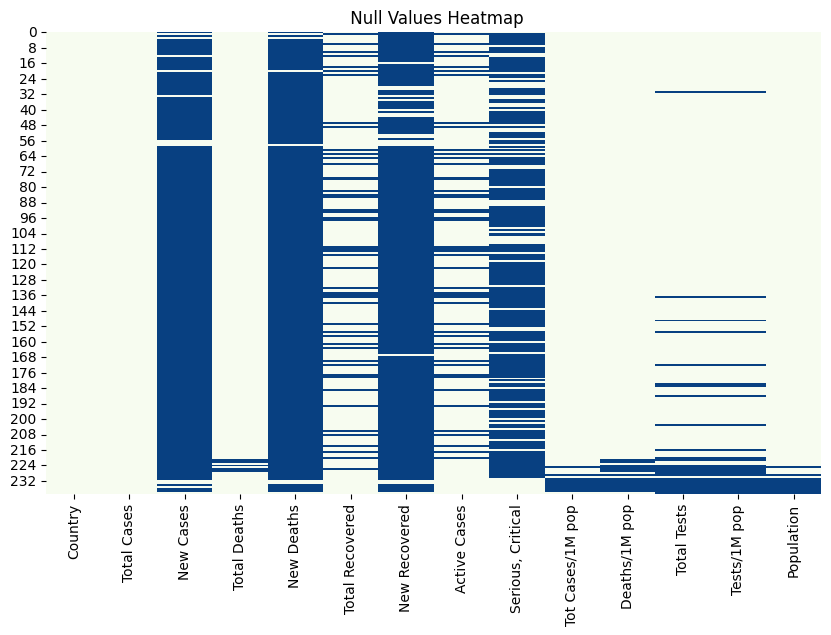

In [ ]:
# Create a heatmap  null values
plt.figure(figsize=(10, 6))
sns.heatmap(covid_df.isnull(), cmap='GnBu', cbar=False)
plt.title(' Null Values Heatmap')
plt.show()


# *Visulization with too many Ticks*

In [ ]:
data = data.dropna()
print(data)

     Country Total Cases New Cases Total Deaths  New Deaths Total Recovered  \
58  Bulgaria   1,339,321        21       38,737         1.0       1,292,587   

   New Recovered Active Cases Serious, Critical Tot Cases/1M pop  \
58             8        7,997                35          195,676   

   Deaths/1M pop Total Tests Tests/1M pop Population  
58         5,660  11,623,445    1,698,193  6,844,597  


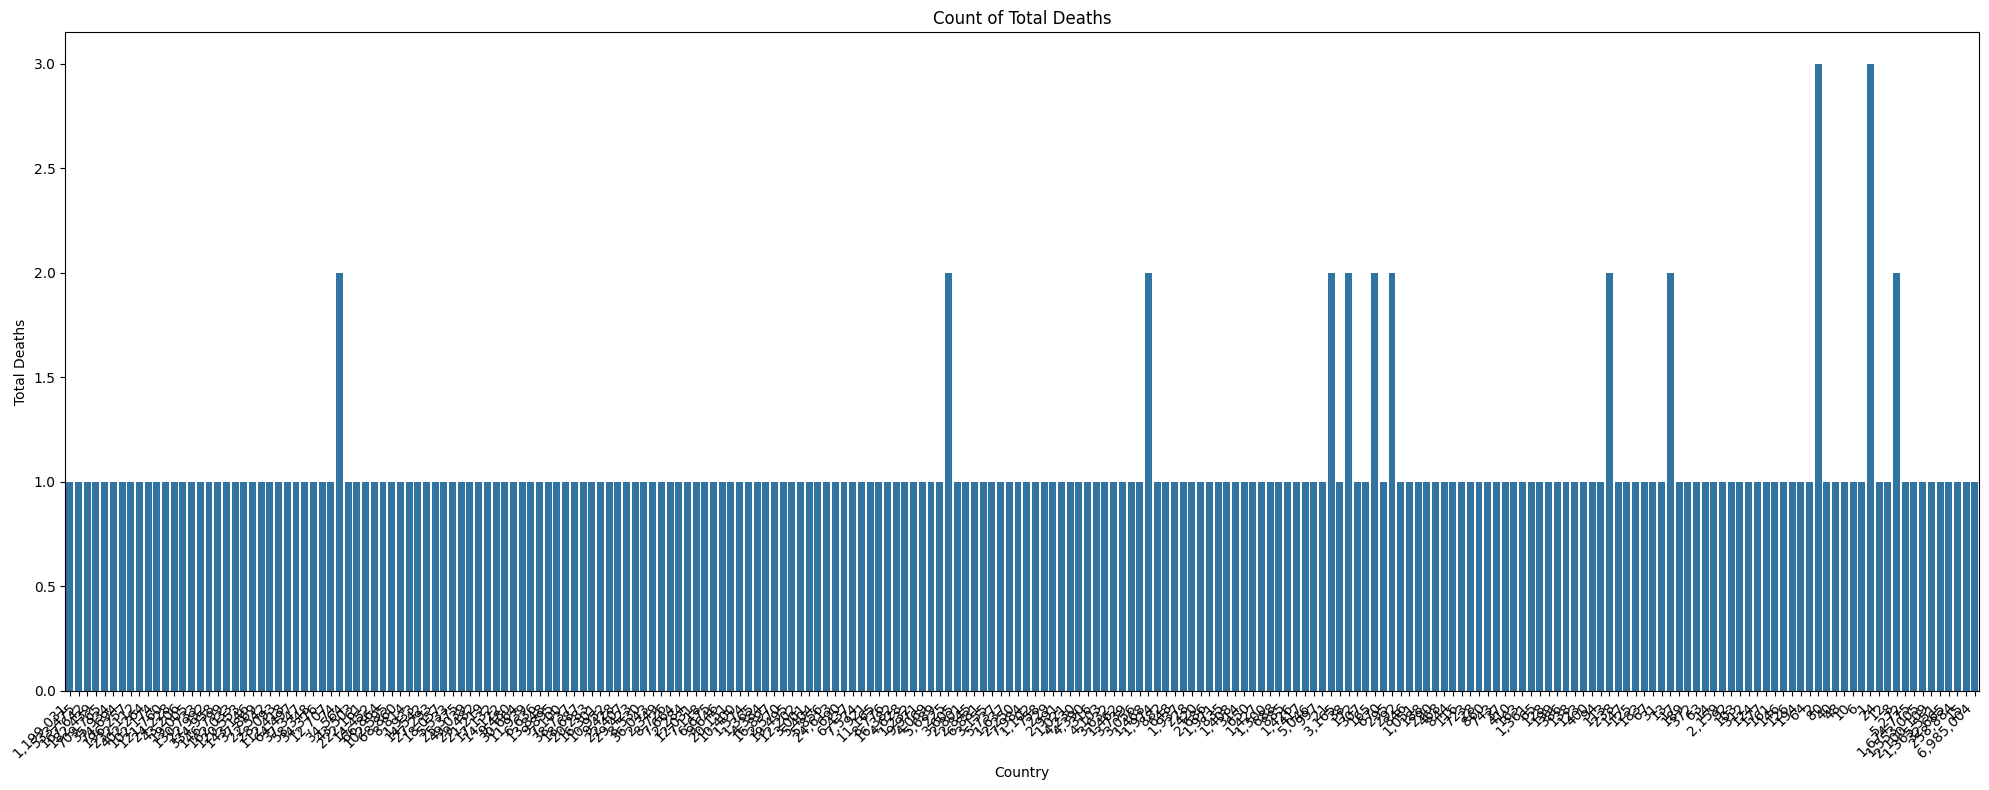

In [ ]:
# Bar chart for 'Total Deaths'
plt.figure(figsize=(20, 8))
sns.countplot(data=covid_df, x='Total Deaths')

plt.title('Count of Total Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()    # Adjust spacing between subplots
plt.show()



Some visualization process on data.
Countries with highest number of

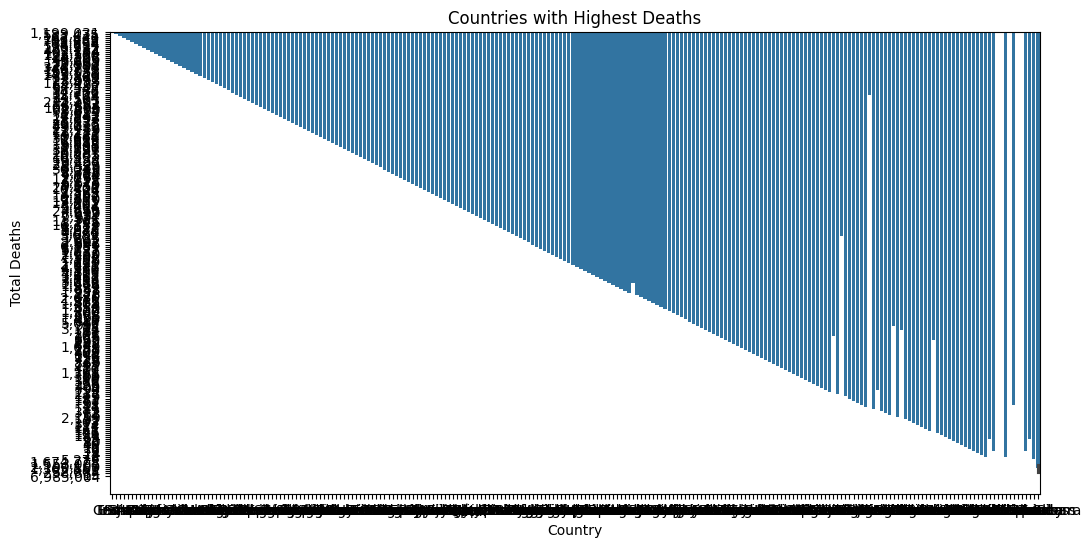

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=covid_df, y='Total Deaths', x='Country')
plt.title("Countries with Highest Deaths")
plt.show()

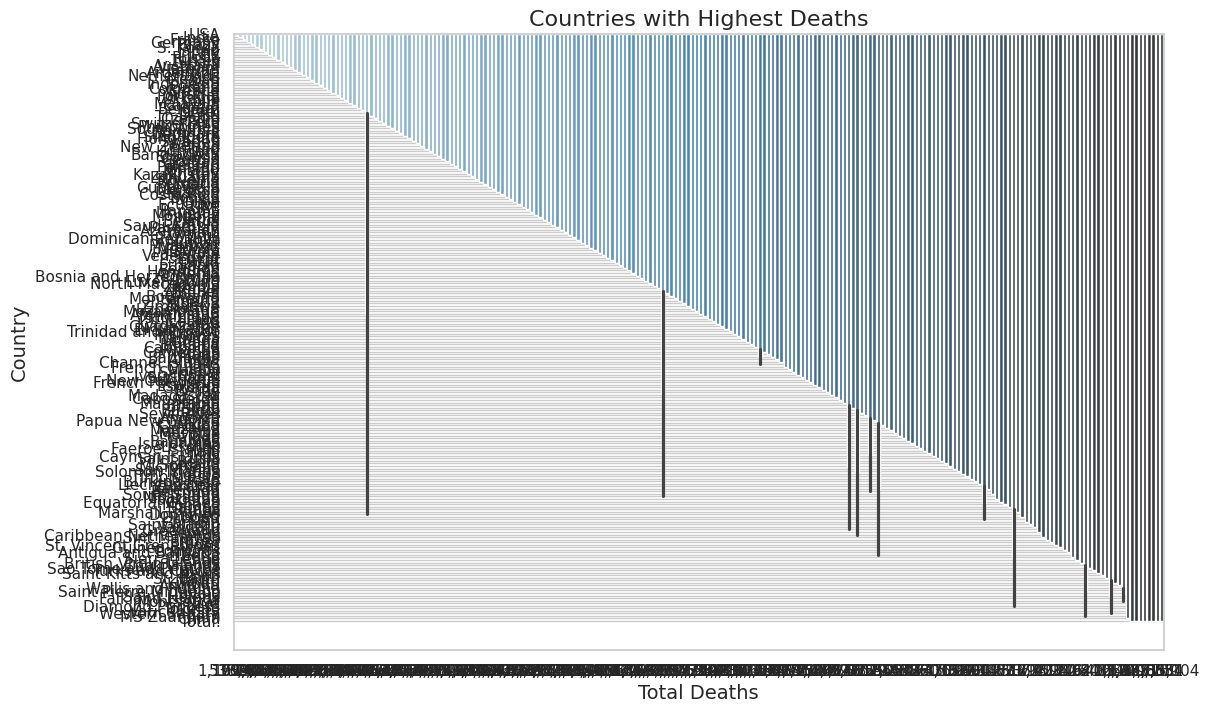

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(data= covid_df, y='Country', x='Total Deaths', palette="Blues_d")
ax.set_title("Countries with Highest Deaths", fontsize=16)
ax.set_xlabel("Total Deaths", fontsize=14)
ax.set_ylabel("Country", fontsize=14)
plt.show()

Also we can use python plotly.express library to make better visualization from our dataset

In [ ]:
import plotly.express as px
figure = px.bar(covid_df, y='Total Deaths', x='Country',
            title="Countries with Highest Deaths")
figure.show()

Countries with highest number of cases.

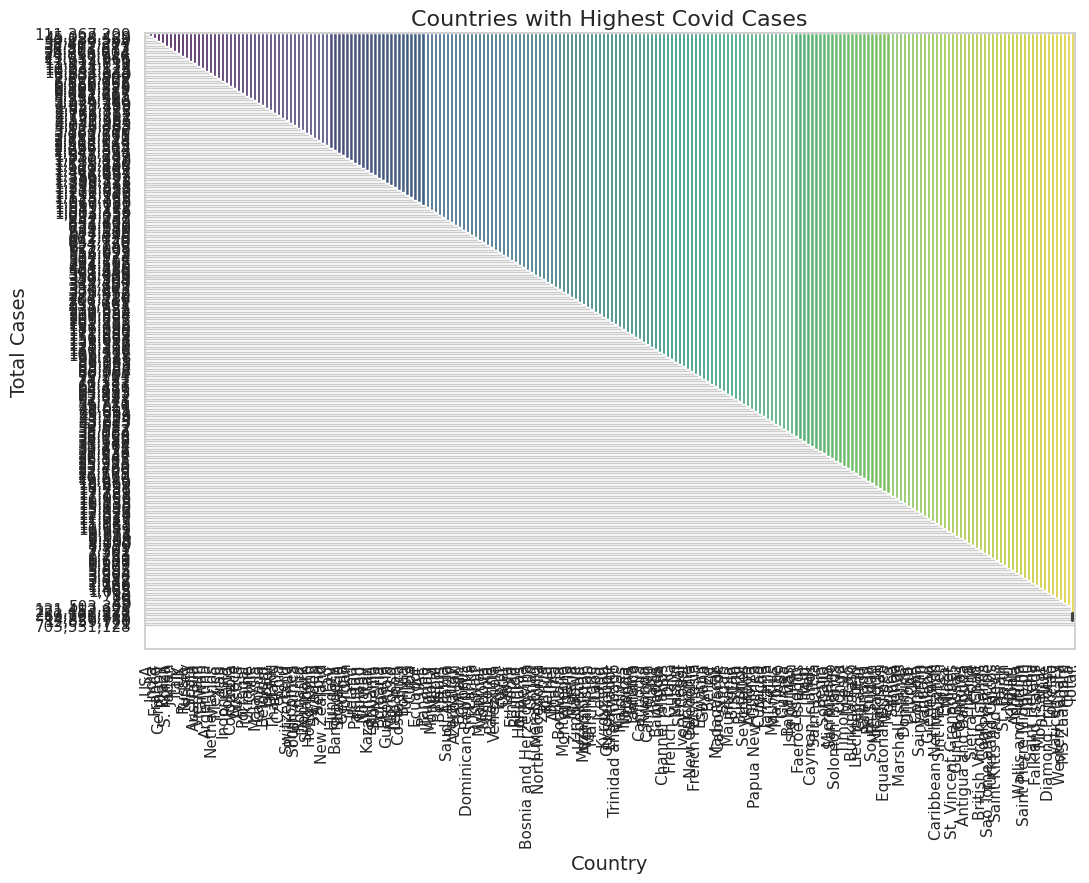

In [ ]:

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ax = sns.barplot(data=covid_df, y='Total Cases', x='Country', palette="viridis")
ax.set_title("Countries with Highest Covid Cases", fontsize=16)
ax.set_xlabel("Country", fontsize=14)
ax.set_ylabel("Total Cases", fontsize=14)
plt.xticks(rotation=90)
plt.show()

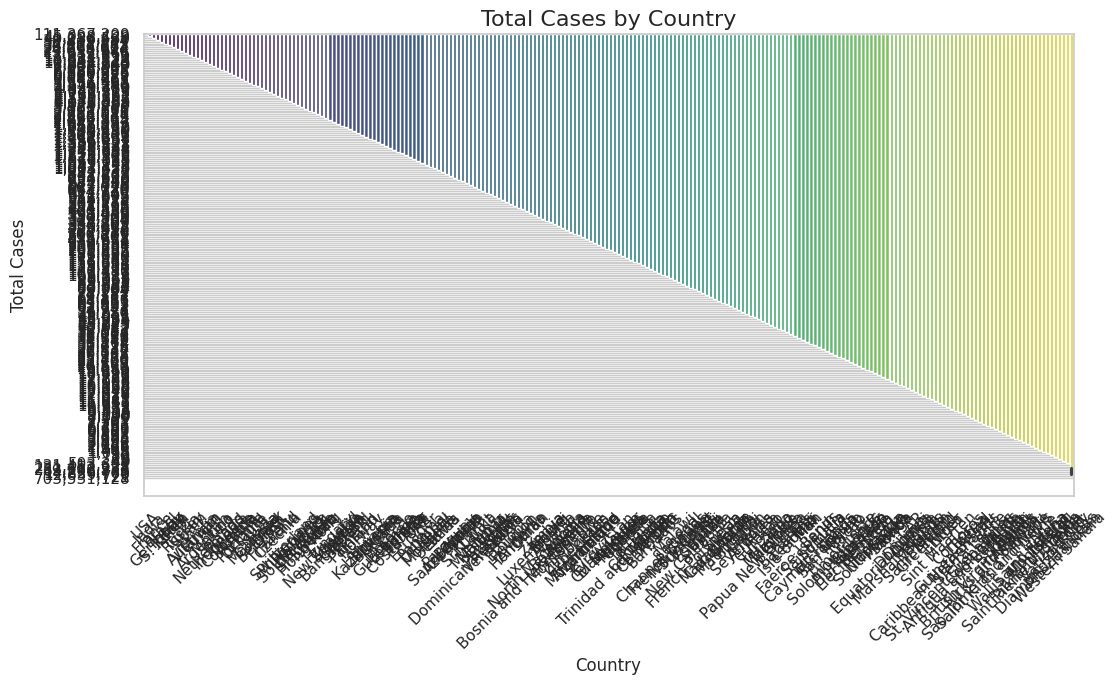

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Total Cases', data=covid_df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.title('Total Cases by Country', fontsize=16)
plt.show()

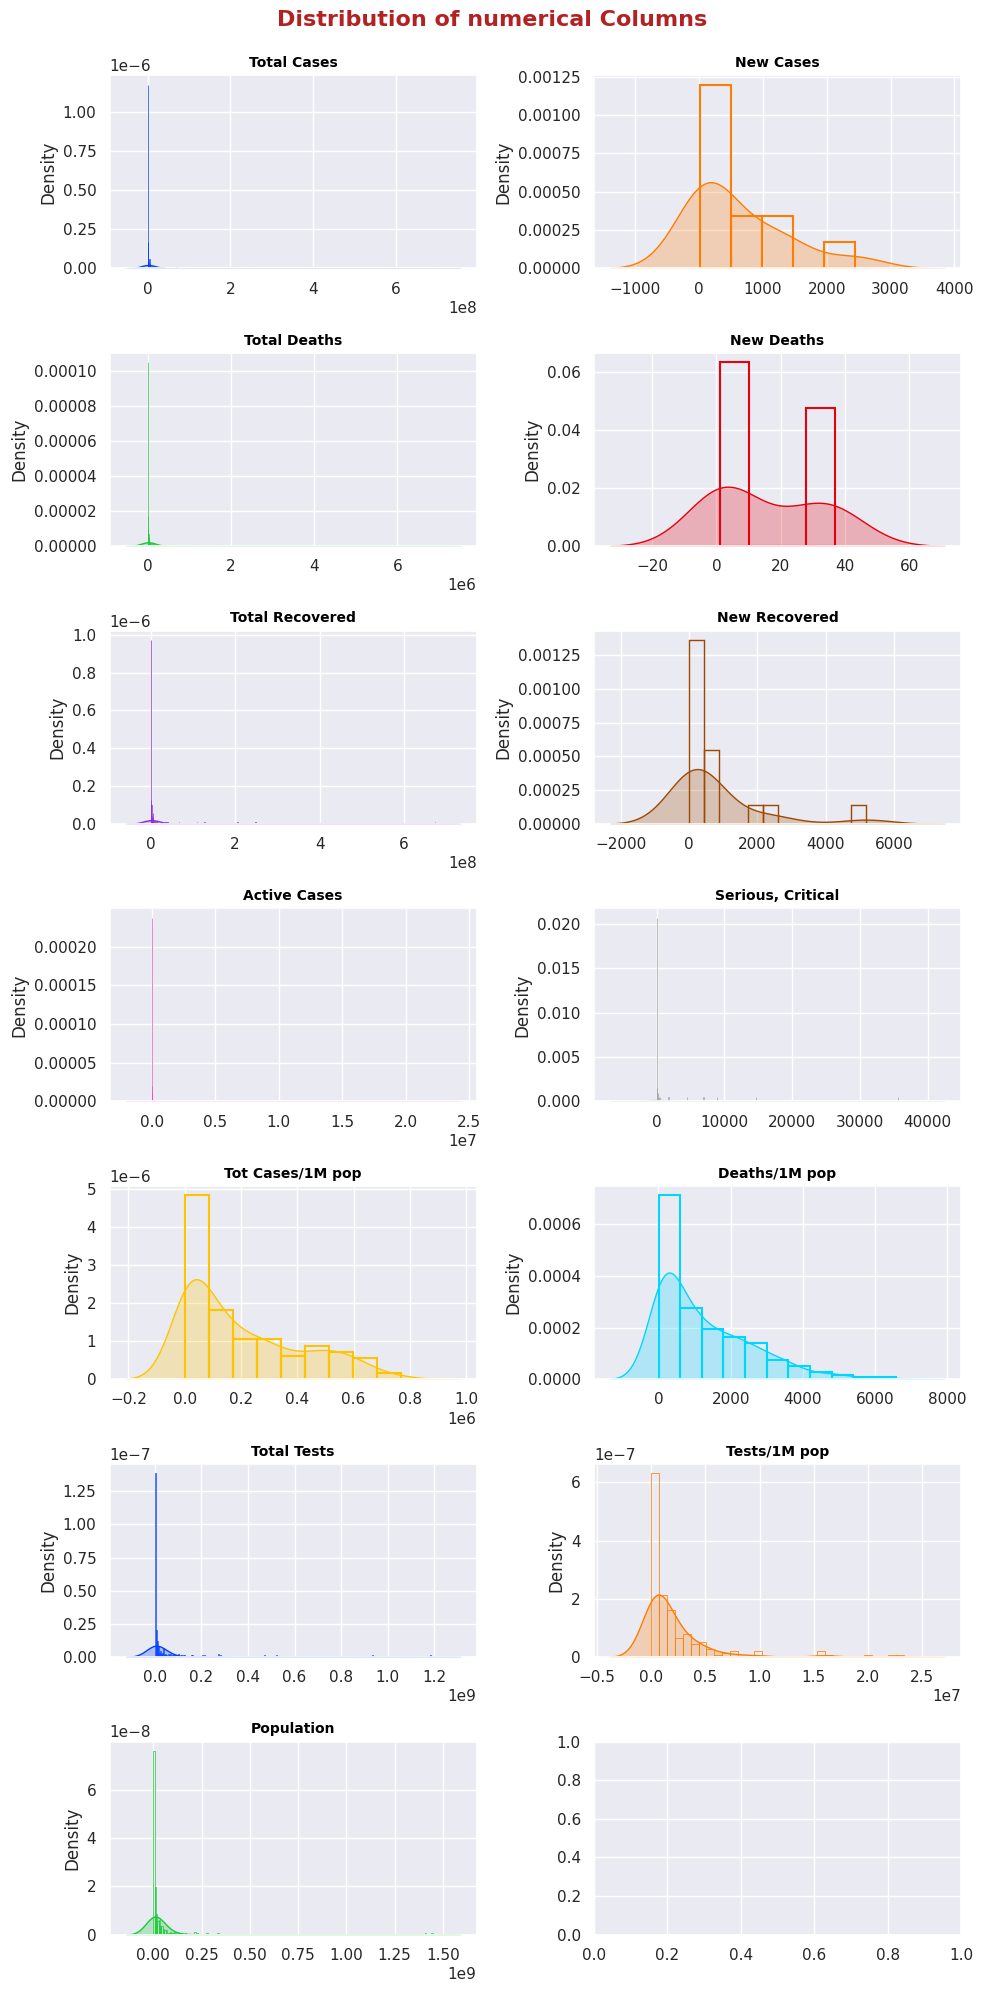

In [ ]:
#
sns.set_style('darkgrid')
colors = sns.color_palette(palette = 'bright',
                           n_colors = len(numerical_cols),)

fig,ax = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 20))
ax = ax.flat

for i,feature in enumerate(numerical_cols):
    sns.kdeplot(df, x = feature, fill = True, color = colors[i], ax = ax[i])
    sns.histplot(df, x = feature, stat = 'density', fill = False, color = colors[i], ax = ax[i])
    ax[i].set_title(feature, fontsize = 10, fontweight = 'bold', color = 'black')
    ax[i].set_xlabel('')

fig.suptitle("Distribution of numerical Columns", fontsize = 16, fontweight = 'bold', color = 'firebrick', y = 0.995)
fig.tight_layout()
fig.show()

# *Bar graph and Histogram for same columns*

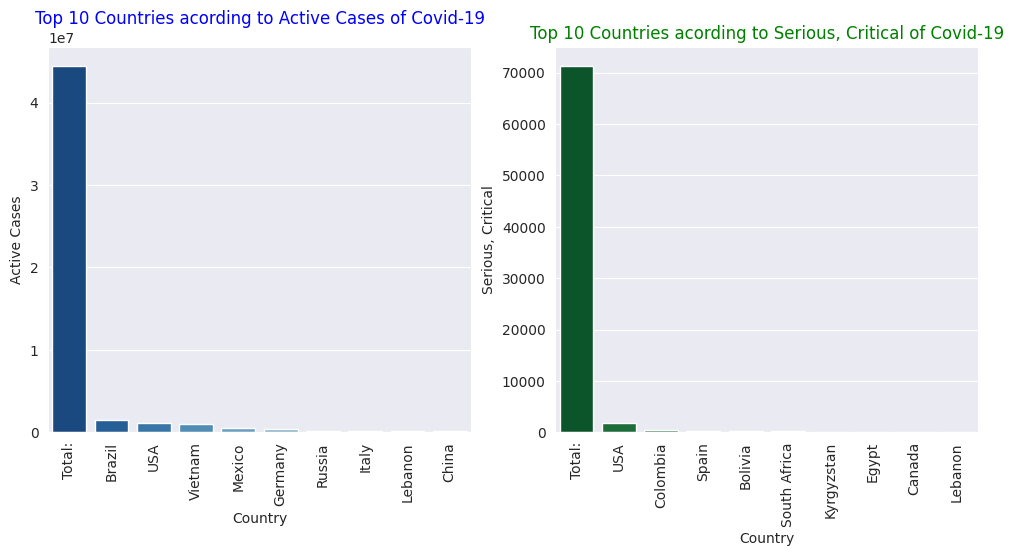

In [ ]:
# Top 10 Countries according to 'Active Cases' / 'Serious, Critical' of Covid-19
plt.figure(figsize = ((12, 5)))
plt.subplot(1, 2, 1)
df_top = df.groupby(['Country'])[['Active Cases']].sum().reset_index()
df_top = df_top.sort_values(by=("Active Cases"), ascending=False).head(10)

sns.barplot(x=df_top["Country"], y=df_top["Active Cases"], palette="Blues_r")
plt.title("Top 10 Countries acording to Active Cases of Covid-19", fontsize = 12, color = 'blue')
plt.xticks(rotation=90, fontsize = 10)

plt.subplot(1, 2, 2)
df_top = df.groupby(['Country'])[['Serious, Critical']].sum().reset_index()
df_top = df_top.sort_values(by=("Serious, Critical"), ascending=False).head(10)

sns.barplot(x=df_top["Country"], y=df_top["Serious, Critical"], palette="Greens_r")
plt.title("Top 10 Countries acording to Serious, Critical of Covid-19", fontsize = 12, color = 'green')
plt.xticks(rotation=90, fontsize = 10)

plt.show()

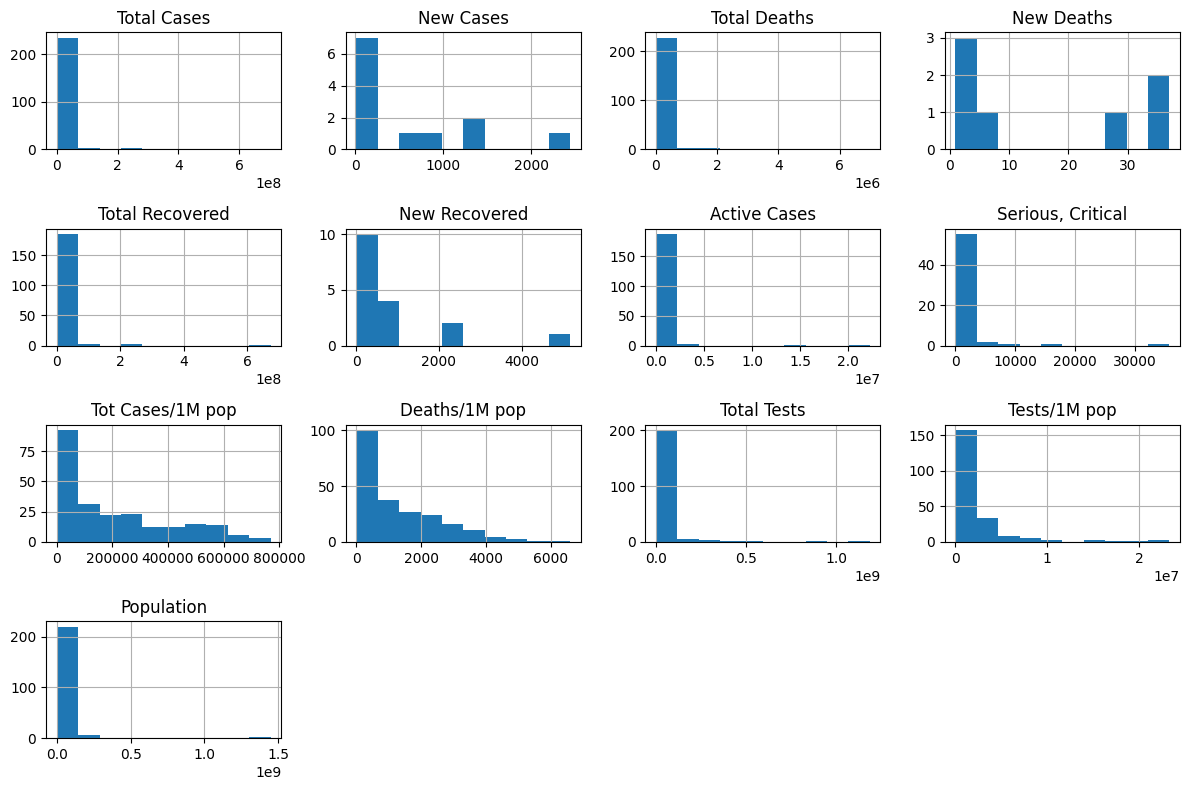

In [ ]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Plotting histograms for each numerical column
numerical_columns.hist(figsize=(12, 8))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()